In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/MENTAL HEALTH DATA.csv')

In [3]:
df.head()

,year_1,state_1,general_health,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,...,acha_12months_any_comp,sex,fulltime,international,race_1,race_2,race_3,race_4,race_5,race_6
0,2000,MD,Very Good,Several days,Several days,Not at all,Several days,Not at all,Not at all,More than half of the days,...,2,Female,Yes,No,NaN,NaN,NaN,Asian or Pacific Islander,NaN,NaN
1,2001,SC,Good,More than half of the days,More than half of the days,Nearly every day,Nearly every day,Nearly every day,Several days,Nearly every day,...,0,Female,Yes,No,NaN,NaN,NaN,Asian or Pacific Islander,NaN,NaN
2,1999,NJ,Good,Several days,Several days,More than half of the days,More than half of the days,Several days,Several days,Several days,...,2,Female,Yes,No,NaN,NaN,Hispanic or Latino,Asian or Pacific Islander,NaN,NaN
3,1998,NY,Good,Several days,Several days,Nearly every day,Nearly every day,Not at all,Several days,Several days,...,2,Female,Yes,No,White - not Hispanic (includes Middle Eastern),NaN,NaN,NaN,NaN,NaN
4,2000,PA,Very Good,Not at all,Several days,Several days,Several days,Several days,Several days,Several days,...,5,Female,Yes,No,White - not Hispanic (includes Middle Eastern),NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(579, 118)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Columns: 118 entries, year_1 to race_6
dtypes: int64(49), object(69)
memory usage: 533.9+ KB


In [8]:
df.isnull().sum()

,0
year_1,0
state_1,0
general_health,0
phq9_1,0
phq9_2,0
...,...
race_2,524
race_3,507
race_4,458
race_5,570


In [15]:
df.dropna(axis = 'columns', how = 'all')

,year_1,state_1,general_health,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,...,acha_12months_any_comp,sex,fulltime,international,race_1,race_2,race_3,race_4,race_5,race_6
0,2000,MD,Very Good,Several days,Several days,Not at all,Several days,Not at all,Not at all,More than half of the days,...,2,Female,Yes,No,NaN,NaN,NaN,Asian or Pacific Islander,NaN,NaN
1,2001,SC,Good,More than half of the days,More than half of the days,Nearly every day,Nearly every day,Nearly every day,Several days,Nearly every day,...,0,Female,Yes,No,NaN,NaN,NaN,Asian or Pacific Islander,NaN,NaN
2,1999,NJ,Good,Several days,Several days,More than half of the days,More than half of the days,Several days,Several days,Several days,...,2,Female,Yes,No,NaN,NaN,Hispanic or Latino,Asian or Pacific Islander,NaN,NaN
3,1998,NY,Good,Several days,Several days,Nearly every day,Nearly every day,Not at all,Several days,Several days,...,2,Female,Yes,No,White - not Hispanic (includes Middle Eastern),NaN,NaN,NaN,NaN,NaN
4,2000,PA,Very Good,Not at all,Several days,Several days,Several days,Several days,Several days,Several days,...,5,Female,Yes,No,White - not Hispanic (includes Middle Eastern),NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,2001,OH,Very Good,More than half of the days,More than half of the days,Several days,Several days,More than half of the days,Several days,More than half of the days,...,5,Male,Yes,No,White - not Hispanic (includes Middle Eastern),Black - not Hispanic,NaN,NaN,NaN,NaN
575,1991,NJ,Good,More than half of the days,More than half of the days,More than half of the days,More than half of the days,Nearly every day,More than half of the days,Nearly every day,...,4,Male,Yes,No,White - not Hispanic (includes Middle Eastern),NaN,NaN,NaN,NaN,NaN
576,1991,VA,Poor,More than half of the days,More than half of the days,More than half of the days,More than half of the days,More than half of the days,Several days,Several days,...,4,Male,Yes,No,White - not Hispanic (includes Middle Eastern),NaN,NaN,NaN,NaN,NaN
577,2000,GA,Very Good,Not at all,Several days,Several days,Several days,Not at all,Not at all,Not at all,...,2,Male,Yes,No,White - not Hispanic (includes Middle Eastern),NaN,NaN,NaN,NaN,NaN


In [9]:
df.general_health.value_counts(normalize = True)

,proportion
general_health,
Good,0.392055
Very Good,0.307427
Fair,0.177893
Excellent,0.072539
Poor,0.050086


In [10]:
df.sex.value_counts(normalize = True)

,proportion
sex,
Female,0.678756
Male,0.321244


In [16]:
df[df.sex == 'Female'].general_health.value_counts(normalize = True)

,proportion
general_health,
Good,0.394402
Very Good,0.300254
Fair,0.180662
Excellent,0.073791
Poor,0.050891


In [17]:
df[df.sex == "Male"].general_health.value_counts(normalize = True)

,proportion
general_health,
Good,0.387097
Very Good,0.322581
Fair,0.172043
Excellent,0.069892
Poor,0.048387


In [18]:
df.groupby('sex').general_health.value_counts(normalize = True)

sex     general_health
Female  Good              0.394402
        Very Good         0.300254
        Fair              0.180662
        Excellent         0.073791
        Poor              0.050891
Male    Good              0.387097
        Very Good         0.322581
        Fair              0.172043
        Excellent         0.069892
        Poor              0.048387
Name: proportion, dtype: float64

<Axes: xlabel='general_health'>

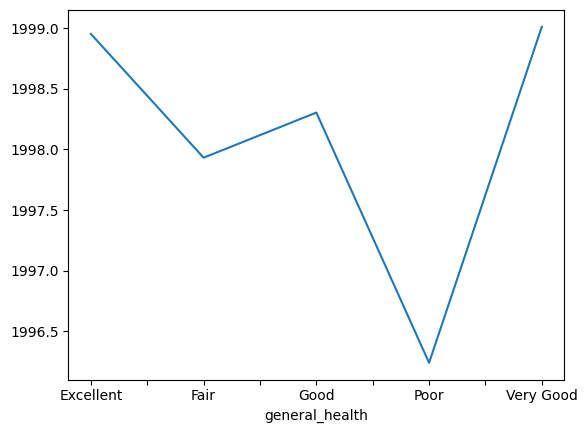

In [20]:
df.groupby(df.general_health).year_1.mean().plot()